<h1>EDA Spotify tracks</h1>

In [ ]:
data = pd.read_csv('../data/tracks_with_binary_target.csv')
data.head()

,title,artist,top genre,followers,artist_popularity,year,tempo,energy,danceability,loudness,liveness,valence,duration,acousticness,speechiness,track_popularity,is_dance_pop
0,"Hey, Soul Sister",Train,neo mellow,3.618665,78.0,2010,97.0,89.0,67.0,-4.0,8.0,80.0,217.0,19.0,4.0,83,0
1,Love The Way You Lie,Eminem,detroit hip hop,42.795820,95.0,2010,87.0,93.0,75.0,-5.0,52.0,64.0,263.0,24.0,23.0,82,0
2,TiK ToK,Kesha,dance pop,6.235482,82.0,2010,120.0,84.0,76.0,-3.0,29.0,71.0,200.0,10.0,14.0,80,1
3,Bad Romance,Lady Gaga,dance pop,16.716518,90.0,2010,119.0,92.0,70.0,-4.0,8.0,71.0,295.0,0.0,4.0,79,1
4,Just the Way You Are,Bruno Mars,pop,29.381079,93.0,2010,109.0,84.0,64.0,-5.0,9.0,43.0,221.0,2.0,4.0,78,0


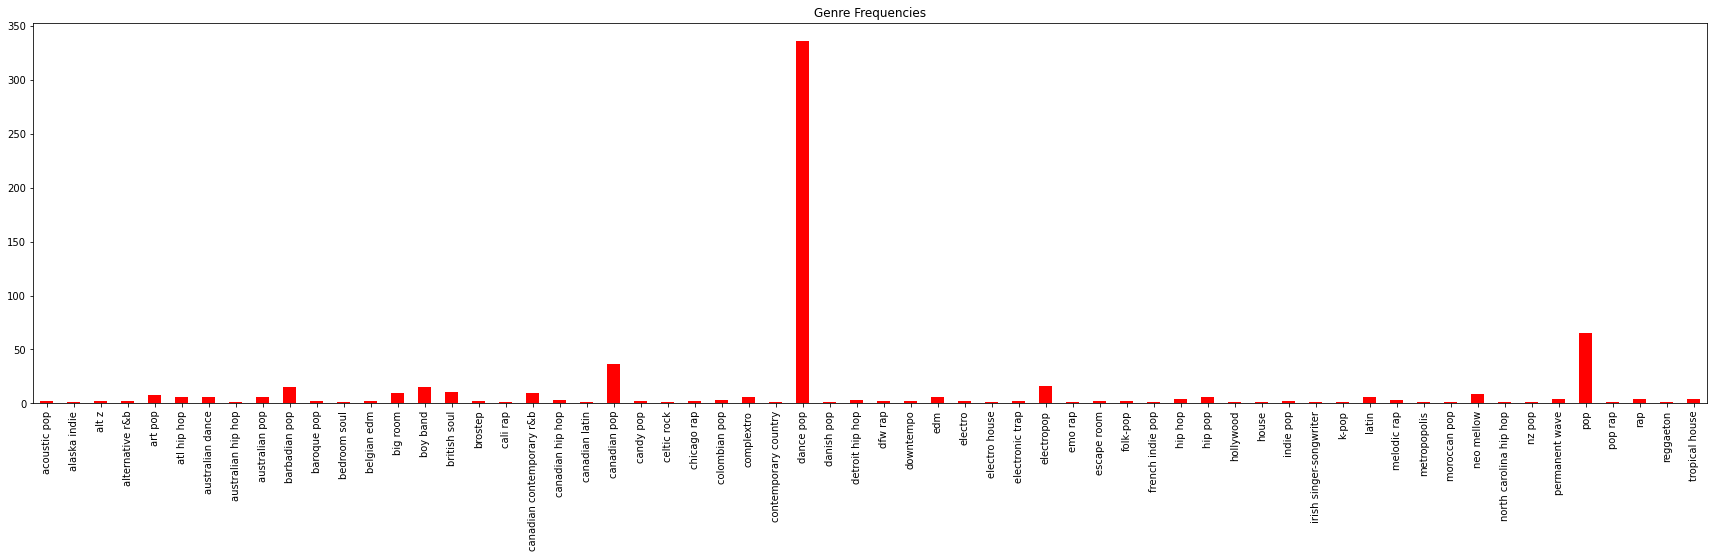

In [ ]:
plt.figure()
data['top genre'].value_counts().sort_index().plot.bar(color='red', figsize=(30, 7), title="Genre Frequencies")
plt.show()

<p>As we can see from the genre frequency plot, dance pop is the most frequent genre with more than half of the songs in the data set having this genre.</p>

In [ ]:
pd.DataFrame(data['top genre'].value_counts() / len(data) * 100)

,top genre
dance pop,51.454824
pop,9.954058
canadian pop,5.666156
electropop,2.450230
barbadian pop,2.297090
...,...
celtic rock,0.153139
north carolina hip hop,0.153139
french indie pop,0.153139
electro house,0.153139


<p>Formally dance pop is the top genre in more than 51% of the tracks.</p>

In [ ]:
is_dance_pop = [1 if data.iloc[i]['top genre'] == 'dance pop' else 0  for i in range(len(data))]

In [ ]:
data['is_dance_pop'] = is_dance_pop

<p>We can use this as a target variable if we want to perform binary 
classification, of course we will need to remove the 'top genre' variable for that matter. We are going to have an almost perfectly balanced target.</p>

In [ ]:
data.to_csv('../data/tracks_with_binary_target.csv', index=False)

<h3>Descriptive statistics</h3>

In [ ]:
data.describe()

,followers,artist_popularity,year,tempo,energy,danceability,loudness,liveness,valence,duration,acousticness,speechiness,track_popularity,is_dance_pop
count,647.000000,647.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000
mean,16.402675,84.958269,2015.006126,118.633266,65.152320,59.505109,-5.628323,16.428526,48.269197,222.782187,13.249327,7.727730,67.831547,0.514548
std,15.562304,8.004437,2.889046,24.825330,24.322637,21.266827,2.770043,13.431093,25.632640,34.722627,20.302432,7.517026,14.827509,0.500171
min,0.044695,53.000000,2010.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,134.000000,0.000000,0.000000,0.000000,0.000000
25%,5.400656,80.500000,2013.000000,100.000000,57.000000,54.000000,-6.903000,8.000000,30.000000,200.000000,1.000000,4.000000,61.000000,0.000000
50%,10.515901,86.000000,2015.000000,120.000000,72.000000,65.000000,-5.000000,12.000000,50.000000,219.000000,5.000000,5.000000,70.000000,1.000000
75%,23.579173,91.000000,2017.000000,129.000000,81.000000,73.000000,-4.000000,22.000000,67.000000,238.000000,15.000000,9.000000,78.000000,1.000000
max,77.890588,100.000000,2020.000000,206.000000,98.000000,97.000000,-2.000000,74.000000,98.000000,424.000000,99.000000,48.000000,99.000000,1.000000


<p>We can see from the counts that we have some missing values for the variables "followers" and "artist_popularity". Let's visualize their distributions, since the variables are continuous.</p>

<h3>Missing values</h3>

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning:

The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning:

The `axis` variable is no longer used and will be removed. Instead, assign variables

[]

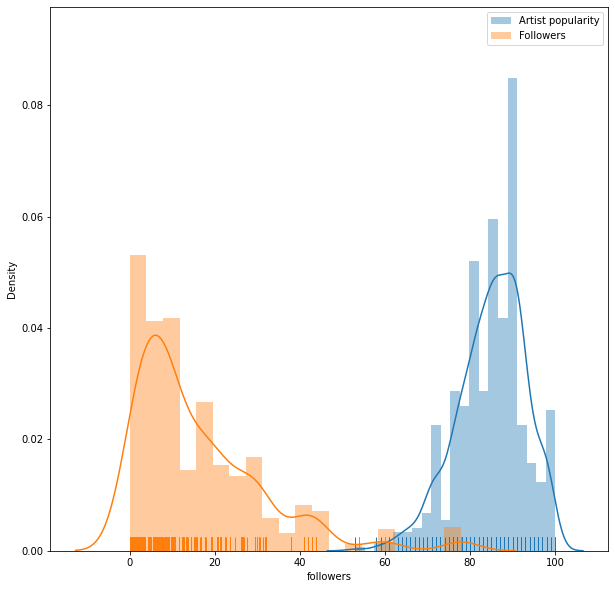

In [ ]:
plt.figure(figsize=(10,10))
sns.distplot(data['artist_popularity'], kde=True, rug=True, label="Artist popularity")
sns.distplot(data['followers'], kde=True, rug=True, label="Followers")
plt.legend()
plt.plot()

<p>As we can see, the two distributions are skewed, with that being more evident with the distribution of the attribute "followers". Thus, it would be a better idea to impute with the median instead of the mean. <br>
Let's inspect the missingness.</p>

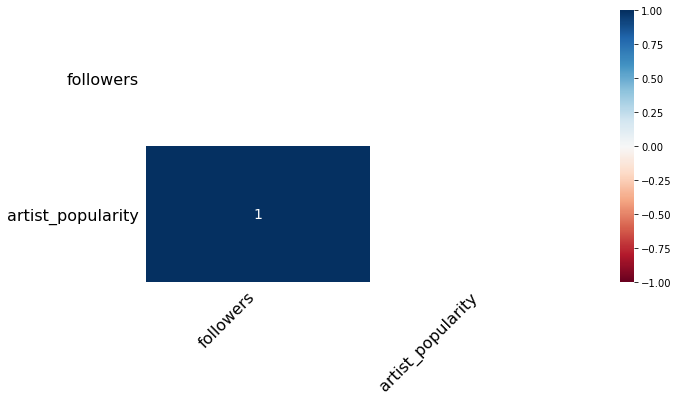

In [ ]:
msno.heatmap(data, figsize=(10,5))
plt.show()

<p>We can see that the missing variables are really correlated in their missingness. It seams that the artists were not found by their name when searching with the Spotify Api.</p>

We can exploit this correlation for the imputation of missing values, but for now let's just impute with the median.

In [ ]:
data = data.fillna(data.median())

In [ ]:
data.isnull().sum()

title                0
artist               0
top genre            0
followers            0
artist_popularity    0
year                 0
tempo                0
energy               0
danceability         0
loudness             0
liveness             0
valence              0
duration             0
acousticness         0
speechiness          0
track_popularity     0
is_dance_pop         0
dtype: int64

<p>Now we have no more missing values.</p>

<h3>Visualizations</h3>

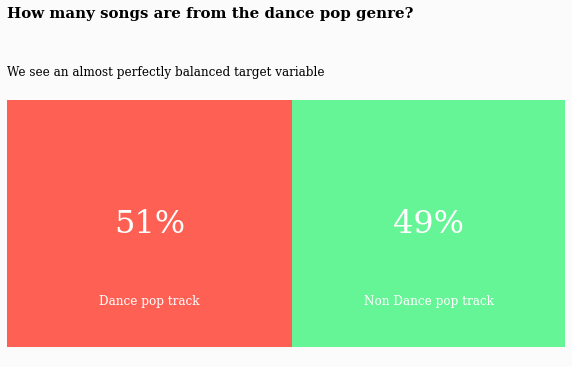

In [ ]:
x=data.groupby(['is_dance_pop'])['is_dance_pop'].count()
y=len(data)
r=((x/y)).round(2)

ratio = pd.DataFrame(r).T

fig, ax = plt.subplots(1,1,figsize=(10, 5))
background_color = "#fbfbfb"
fig.patch.set_facecolor(background_color)
ax.set_facecolor(background_color) 

ax.barh(ratio.index, ratio[1.0], 
        color='#ff4f42', alpha=0.9, label='Dance pop track')
ax.barh(ratio.index, ratio[0.0], left=ratio[1.0], 
        color='#56f58b', alpha=0.9, label='Non Dance pop track')

ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticks([])

for i in ratio.index:
    ax.annotate(f"{int(ratio[1.0][i]*100)}%", 
                   xy=(ratio[1.0][i]/2, i),
                   va = 'center', ha='center',fontsize=32, fontweight='light', fontfamily='serif',
                   color='white')

    ax.annotate("Dance pop track", 
                   xy=(ratio[1.0][i]/2, -0.25),
                   va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',
                   color='white')
    
for i in ratio.index:
    ax.annotate(f"{int(ratio[0.0][i]*100)}%", 
                   xy=(ratio[1.0][i]+ratio[0.0][i]/2, i),
                   va = 'center', ha='center',fontsize=32, fontweight='light', fontfamily='serif',
                   color='white')
    ax.annotate("Non Dance pop track", 
                   xy=(ratio[1.0][i]+ratio[0.0][i]/2, -0.25),
                   va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',
                   color='white')

fig.text(0.125,1.075,'How many songs are from the dance pop genre?', fontfamily='serif',fontsize=15, fontweight='bold')
fig.text(0.125,0.915,'We see an almost perfectly balanced target variable',fontfamily='serif',fontsize=12)  

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

ax.legend().set_visible(False)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning:

The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning:

The `axis` variable is no longer used and will be removed. Instead, assign variables

<Figure size 720x720 with 0 Axes>

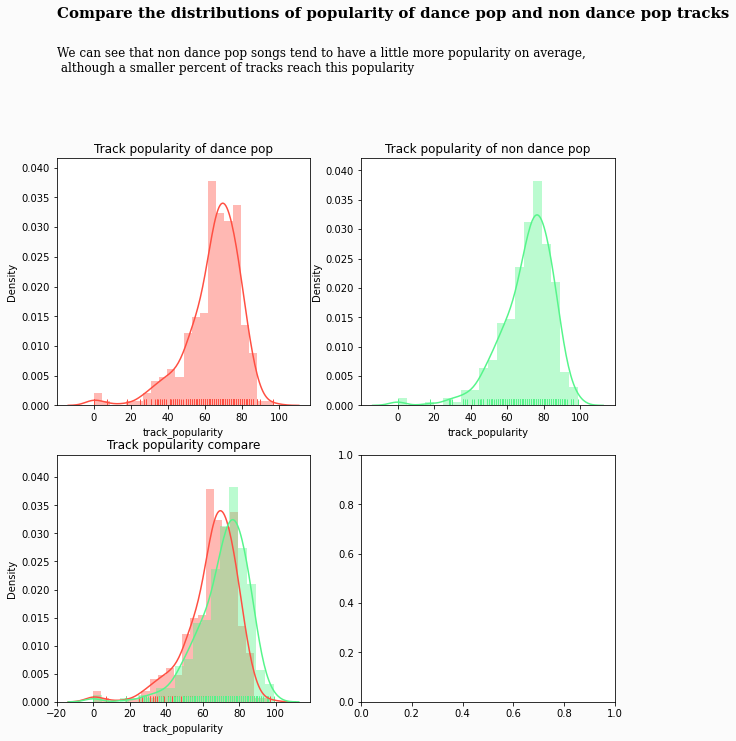

In [ ]:
plt.figure(figsize=(10, 10))
fig, ax = plt.subplots(2,2,figsize=(10, 10))
background_color = "#fbfbfb"
fig.patch.set_facecolor(background_color)

fig.text(0.125,1.075,'Compare the distributions of popularity of dance pop and non dance pop tracks', fontfamily='serif',fontsize=15, fontweight='bold')
fig.text(0.125,1.0,'We can see that non dance pop songs tend to have a little more popularity on average,\n although a smaller percent of tracks reach this popularity',fontfamily='serif',fontsize=12)  

plt.subplot(2,2,1)
sns.distplot(data[data['is_dance_pop']==1]['track_popularity'], color='#ff4f42', kde=True, rug=True)
plt.title('Track popularity of dance pop')
plt.subplot(2,2,2)
sns.distplot(data[data['is_dance_pop']==0]['track_popularity'], color='#56f58b', kde=True, rug=True)
plt.title('Track popularity of non dance pop')
plt.subplot(2,2,3)
sns.distplot(data[data['is_dance_pop']==1]['track_popularity'], color='#ff4f42', kde=True, rug=True)
sns.distplot(data[data['is_dance_pop']==0]['track_popularity'], color='#56f58b', kde=True, rug=True)
plt.title('Track popularity compare')
plt.show()

In [ ]:
most_popular_artists = data['artist'].value_counts().sort_values(ascending=False).head(10).sort_values().to_frame()

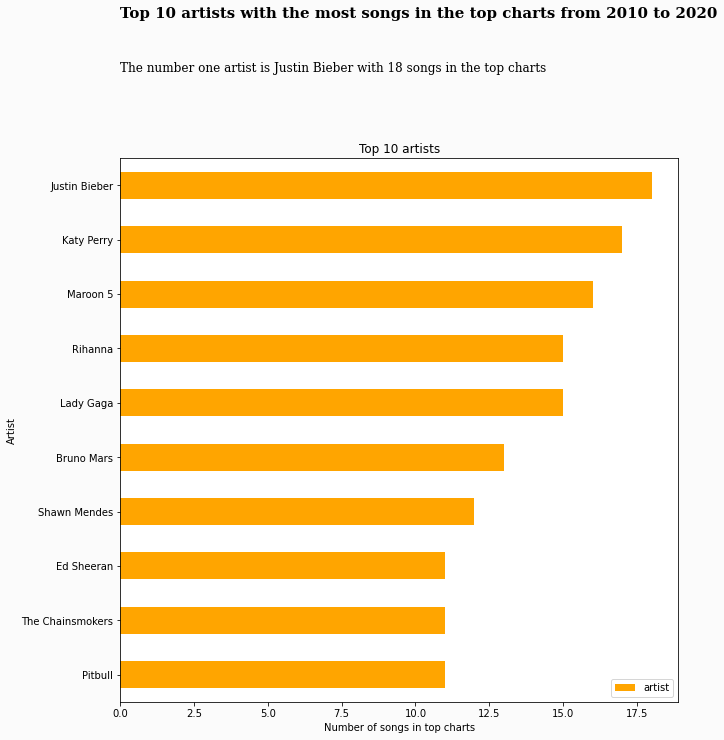

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(10, 10))
background_color = "#fbfbfb"
fig.patch.set_facecolor(background_color)

fig.text(0.125,1.075,'Top 10 artists with the most songs in the top charts from 2010 to 2020', fontfamily='serif',fontsize=15, fontweight='bold')
fig.text(0.125,1.0,'The number one artist is Justin Bieber with 18 songs in the top charts',fontfamily='serif',fontsize=12)  
most_popular_artists.plot.barh(title='Top 10 artists', color='orange', ax=ax)
plt.xlabel('Number of songs in top charts')
plt.ylabel('Artist')
plt.show()

In [ ]:
colors = ['#014f1b', '#027027', '#019132', '#03ab3c', '#04bf43',
          '#02d64a', '#02e34f', '#38ff7c', '#9cffbe', '#a7d9b8', '#70a181']

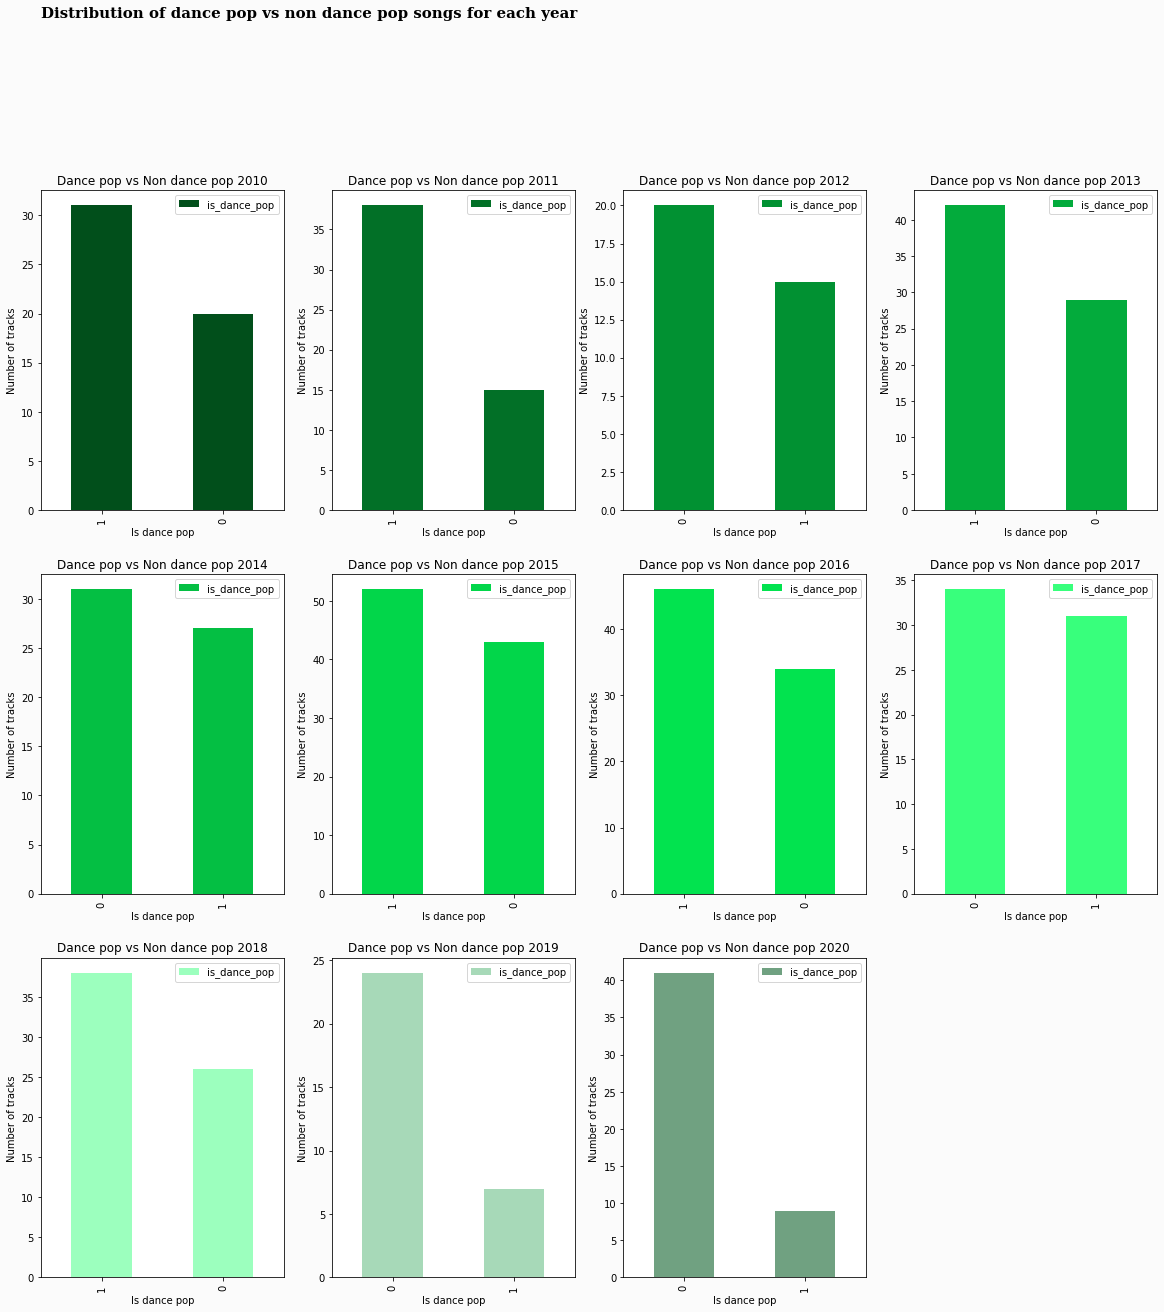

In [ ]:
fig = plt.figure(figsize=(20, 20), facecolor="#fbfbfb")
fig.text(0.125,1.0,'Distribution of dance pop vs non dance pop songs for each year', fontfamily='serif',fontsize=15, fontweight='bold')
for year in range(2010, 2021):
  yearly = data[data['year']==year]
  plt.subplot(3,4,year-2009)
  yearly['is_dance_pop'].value_counts().to_frame().plot.bar(title='Dance pop vs Non dance pop ' + str(year), ax=plt.gca(), color=colors[year-2010])
  plt.xlabel('Is dance pop')
  plt.ylabel('Number of tracks')
plt.show()

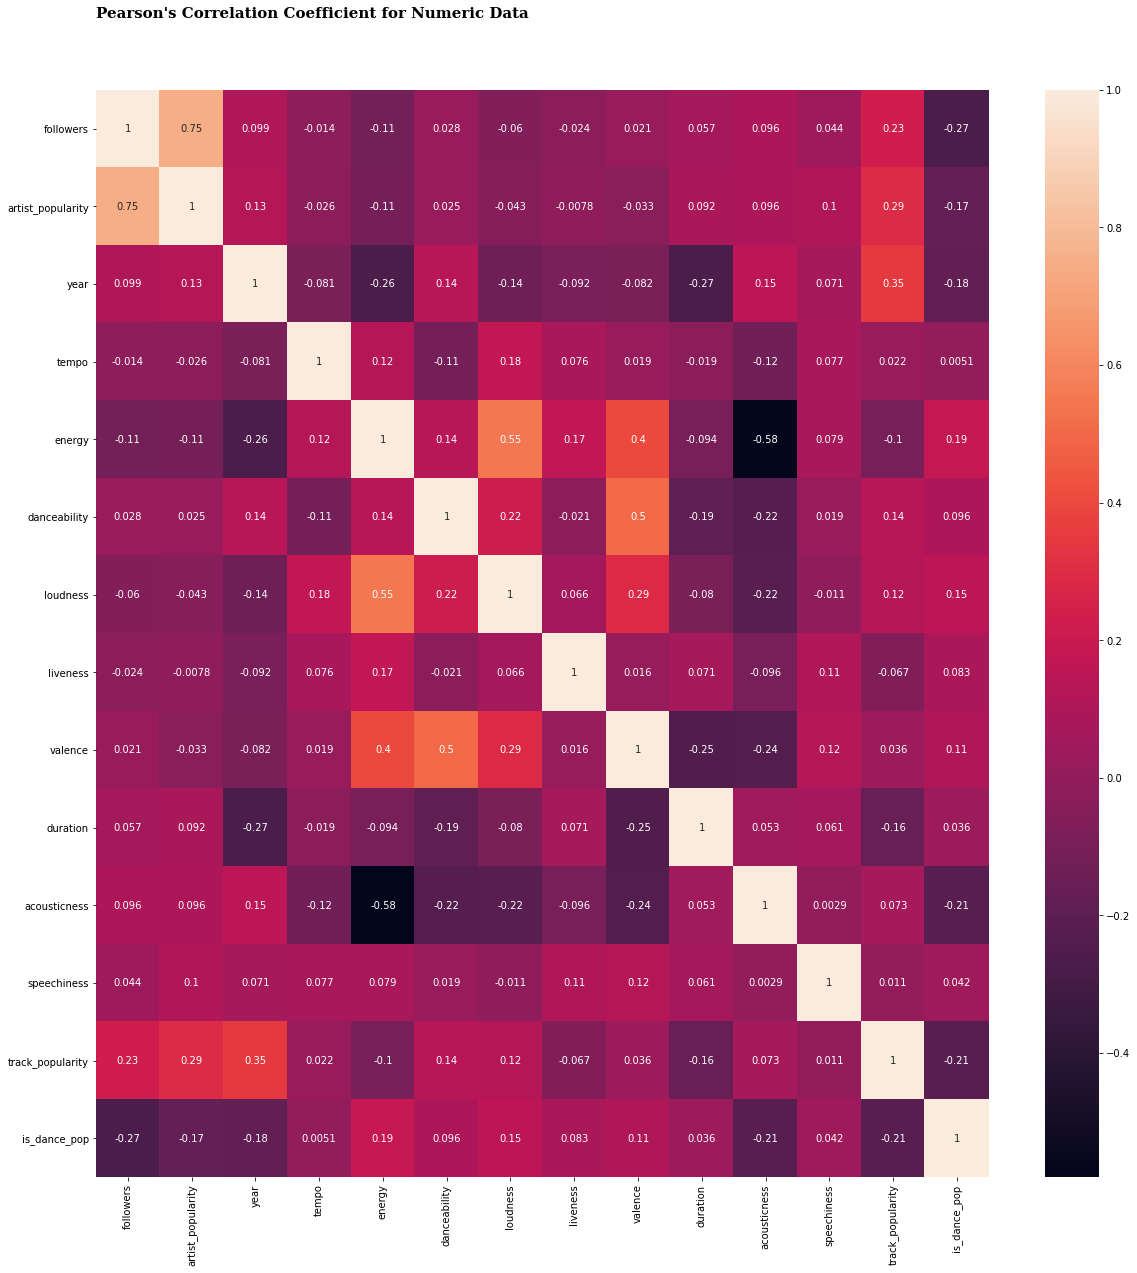

In [ ]:
fig = plt.figure(figsize=(20,20))
fig.text(0.125,0.93,'Pearson\'s Correlation Coefficient for Numeric Data', fontfamily='serif',fontsize=15, fontweight='bold')
sns.heatmap(data.corr(), annot=True)
plt.show()

<p>Now let's check Spearman Coefficient</p>

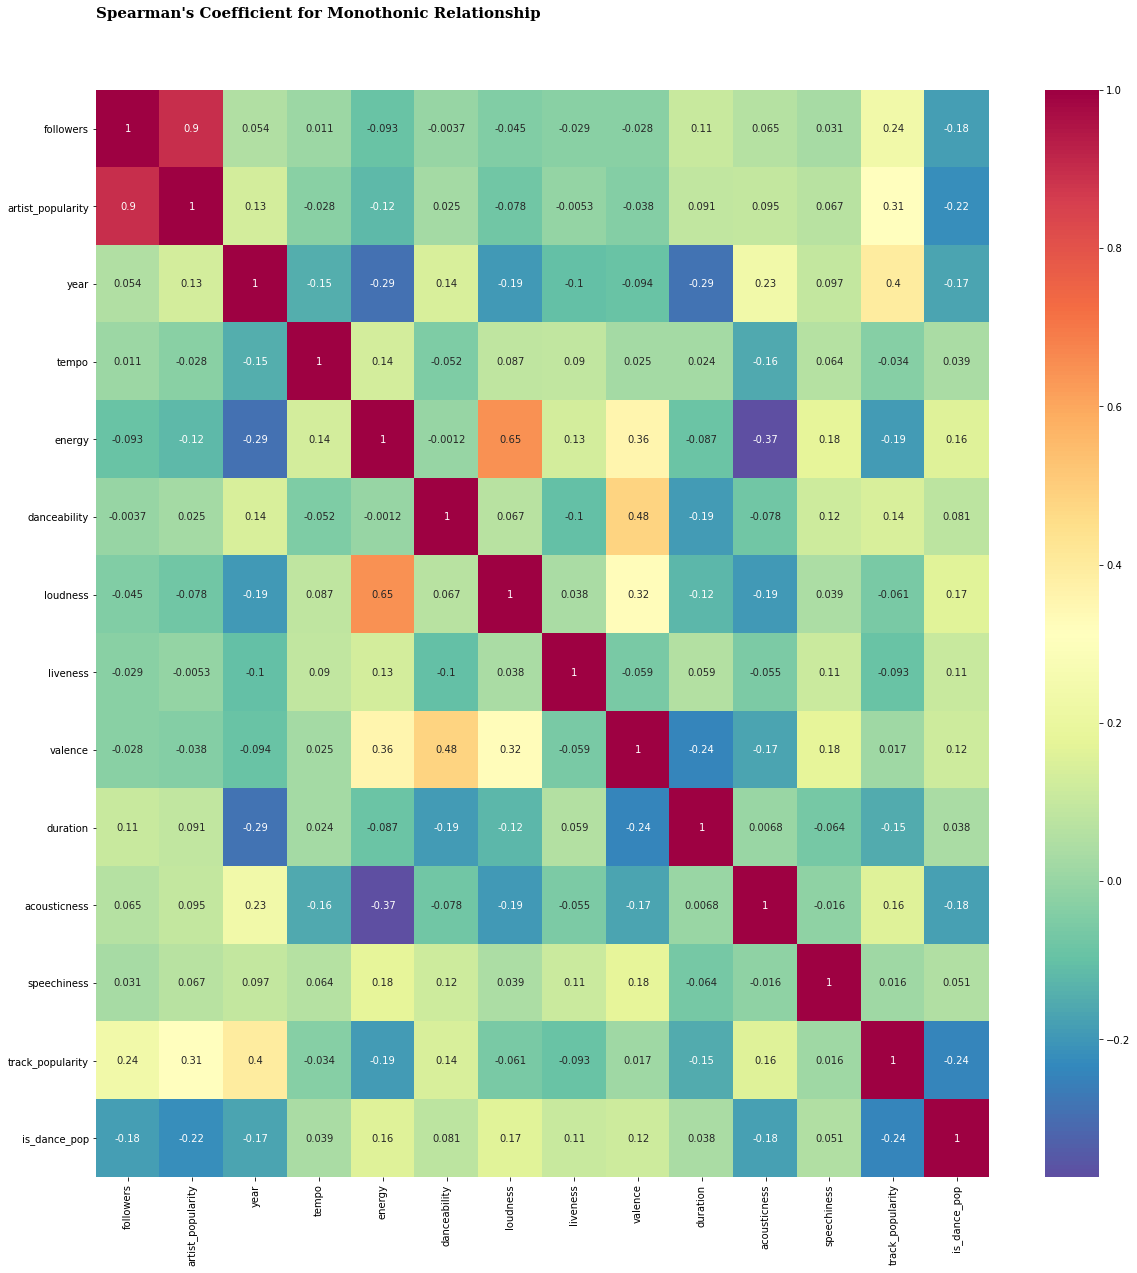

In [ ]:
fig = plt.figure(figsize=(20,20))
fig.text(0.125,0.93,'Spearman\'s Coefficient for Monothonic Relationship', fontfamily='serif',fontsize=15, fontweight='bold')
sns.heatmap(data.corr(method="spearman"), annot=True, cmap='Spectral_r')
plt.show()

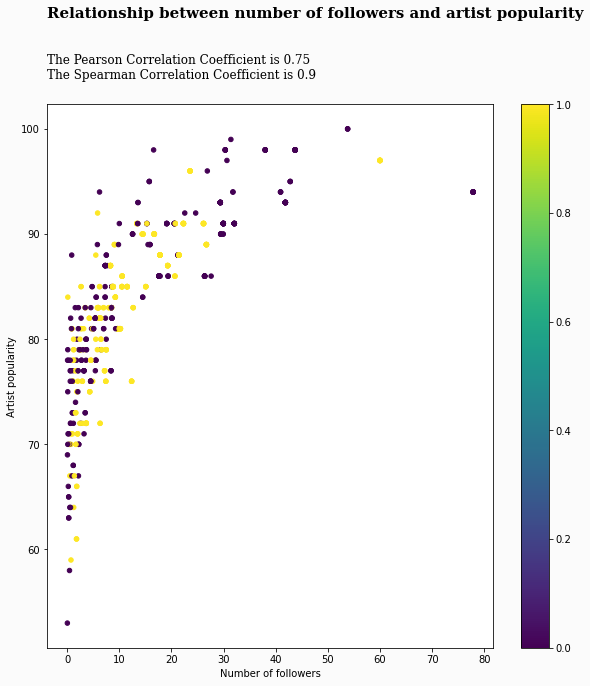

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(10, 10))
background_color = "#fbfbfb"
fig.patch.set_facecolor(background_color)
fig.text(0.125,1.0,'Relationship between number of followers and artist popularity', fontfamily='serif',fontsize=15, fontweight='bold')
fig.text(0.125,0.915,'The Pearson Correlation Coefficient is 0.75 \nThe Spearman Correlation Coefficient is 0.9',fontfamily='serif',fontsize=12)  

data.plot.scatter('followers', 'artist_popularity', c=data['is_dance_pop'], cmap='viridis', ax=ax)
plt.xlabel('Number of followers')
plt.ylabel('Artist popularity')
plt.show()

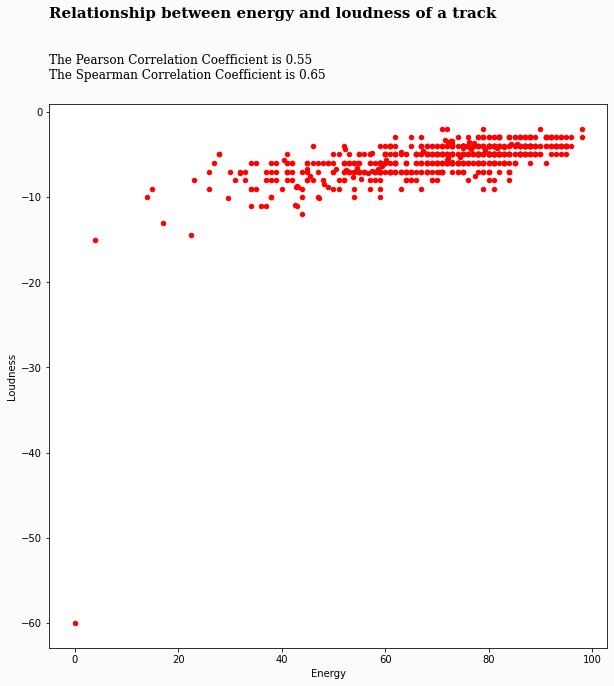

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(10, 10))
background_color = "#fbfbfb"
fig.patch.set_facecolor(background_color)
fig.text(0.125,1.0,'Relationship between energy and loudness of a track', fontfamily='serif',fontsize=15, fontweight='bold')
fig.text(0.125,0.915,'The Pearson Correlation Coefficient is 0.55 \nThe Spearman Correlation Coefficient is 0.65',fontfamily='serif',fontsize=12) 

data.plot.scatter('energy', 'loudness', ax=ax, color='red')
plt.xlabel('Energy')
plt.ylabel('Loudness')
plt.show()

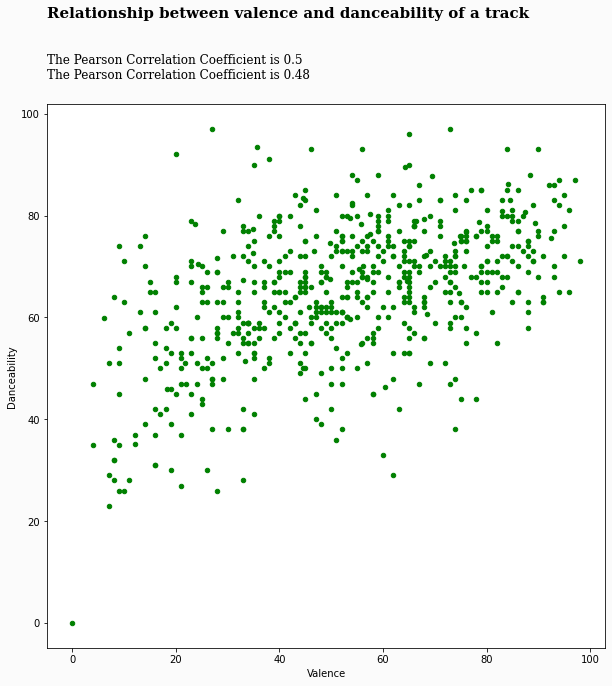

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(10, 10))
background_color = "#fbfbfb"
fig.patch.set_facecolor(background_color)
fig.text(0.125,1.0,'Relationship between valence and danceability of a track', fontfamily='serif',fontsize=15, fontweight='bold')
fig.text(0.125,0.915,'The Pearson Correlation Coefficient is 0.5\nThe Pearson Correlation Coefficient is 0.48',fontfamily='serif',fontsize=12)  

data.plot.scatter('valence', 'danceability', ax=ax, color='green')
plt.xlabel('Valence')
plt.ylabel('Danceability')
plt.show()

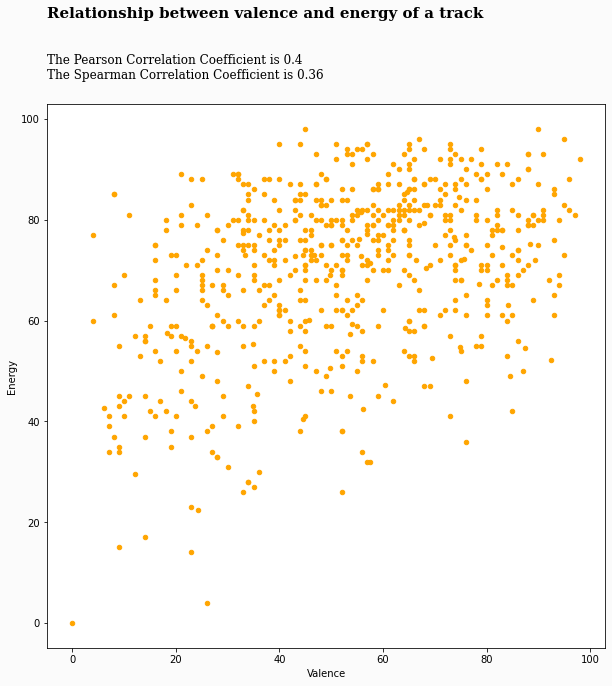

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(10, 10))
background_color = "#fbfbfb"
fig.patch.set_facecolor(background_color)
fig.text(0.125,1.0,'Relationship between valence and energy of a track', fontfamily='serif',fontsize=15, fontweight='bold')
fig.text(0.125,0.915,'The Pearson Correlation Coefficient is 0.4\nThe Spearman Correlation Coefficient is 0.36',fontfamily='serif',fontsize=12)  

data.plot.scatter('valence', 'energy', ax=ax, color='orange')
plt.xlabel('Valence')
plt.ylabel('Energy')
plt.show()

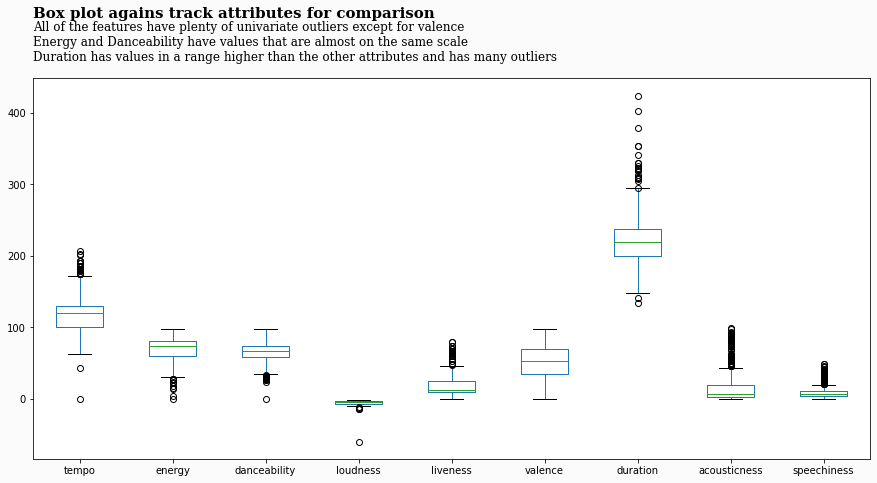

In [ ]:
fig = plt.figure(figsize=(15,7))
background_color = "#fbfbfb"
fig.patch.set_facecolor(background_color)
fig.text(0.125,1.0,'Box plot agains track attributes for comparison', fontfamily='serif',fontsize=15, fontweight='bold')
fig.text(0.125,0.915,'All of the features have plenty of univariate outliers except for valence\n' + 
        'Energy and Danceability have values that are almost on the same scale\n' + 
         'Duration has values in a range higher than the other attributes and has many outliers',fontfamily='serif',fontsize=12) 

data[['tempo','energy','danceability','loudness',	'liveness',	'valence', 'duration',	'acousticness','speechiness']].plot.box(ax=plt.gca())
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning:

The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning:

The `axis` variable is no longer used and will be removed. Instead, assign variables

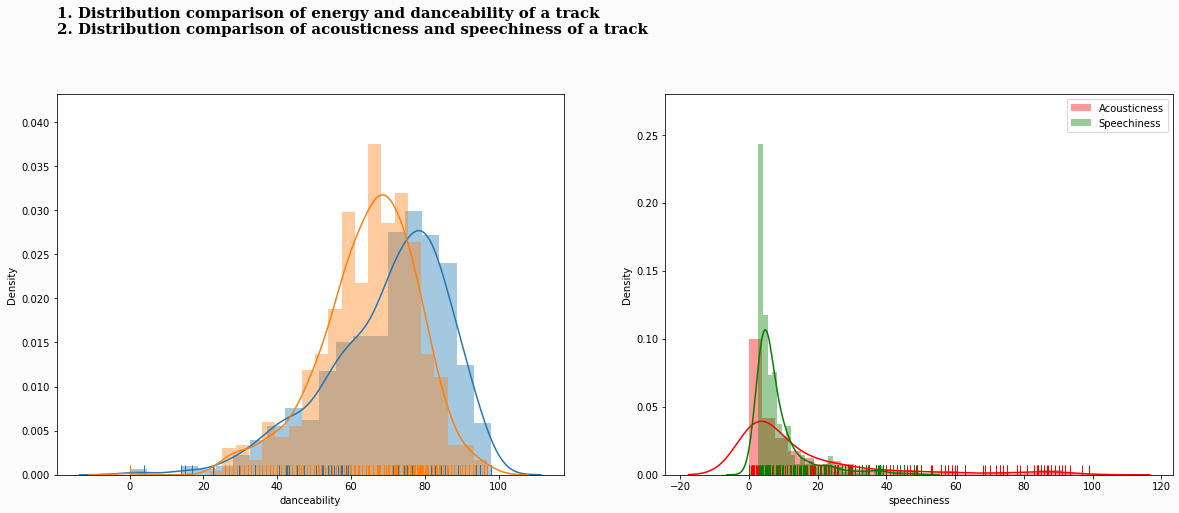

In [ ]:
fig = plt.figure(figsize=(20,7))
background_color = "#fbfbfb"
fig.patch.set_facecolor(background_color)
fig.text(0.125,1.0,'1. Distribution comparison of energy and danceability of a track\n' + 
         '2. Distribution comparison of acousticness and speechiness of a track', fontfamily='serif',fontsize=15, fontweight='bold')
plt.subplot(1,2,1)
sns.distplot(data['energy'], kde=True, rug=True, label='Energy', ax=plt.gca())
sns.distplot(data['danceability'], kde=True, rug=True, label='Danceability', ax=plt.gca())
plt.subplot(1,2,2)
sns.distplot(data['acousticness'], kde=True, rug=True, label='Acousticness', ax=plt.gca(), color='red')
sns.distplot(data['speechiness'], kde=True, rug=True, label='Speechiness', ax=plt.gca(), color='green')
plt.legend()
plt.show()

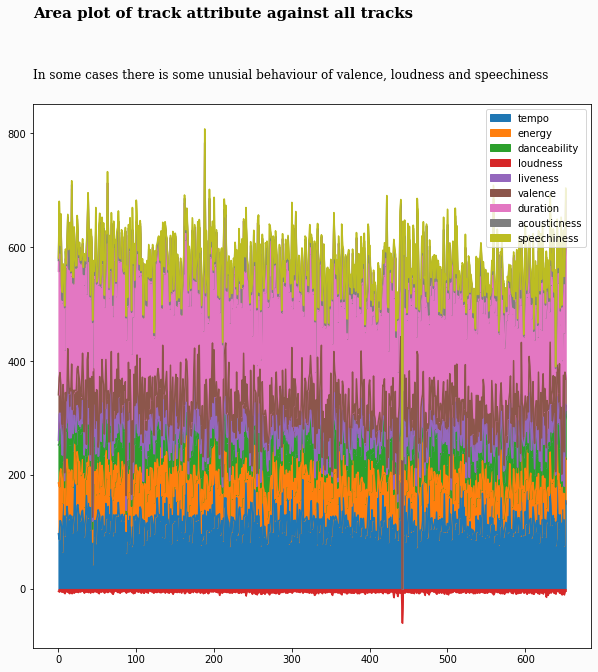

In [ ]:
fig = plt.figure(figsize=(10,10))
background_color = "#fbfbfb"
fig.patch.set_facecolor(background_color)
fig.text(0.125,1.0,'Area plot of track attribute against all tracks', fontfamily='serif',fontsize=15, fontweight='bold')
fig.text(0.125,0.915,'In some cases there is some unusial behaviour of valence, loudness and speechiness',fontfamily='serif',fontsize=12) 
data.plot.area(y=['tempo','energy','danceability','loudness',	'liveness',	'valence', 'duration',	'acousticness','speechiness'], ax=plt.gca())
plt.show()

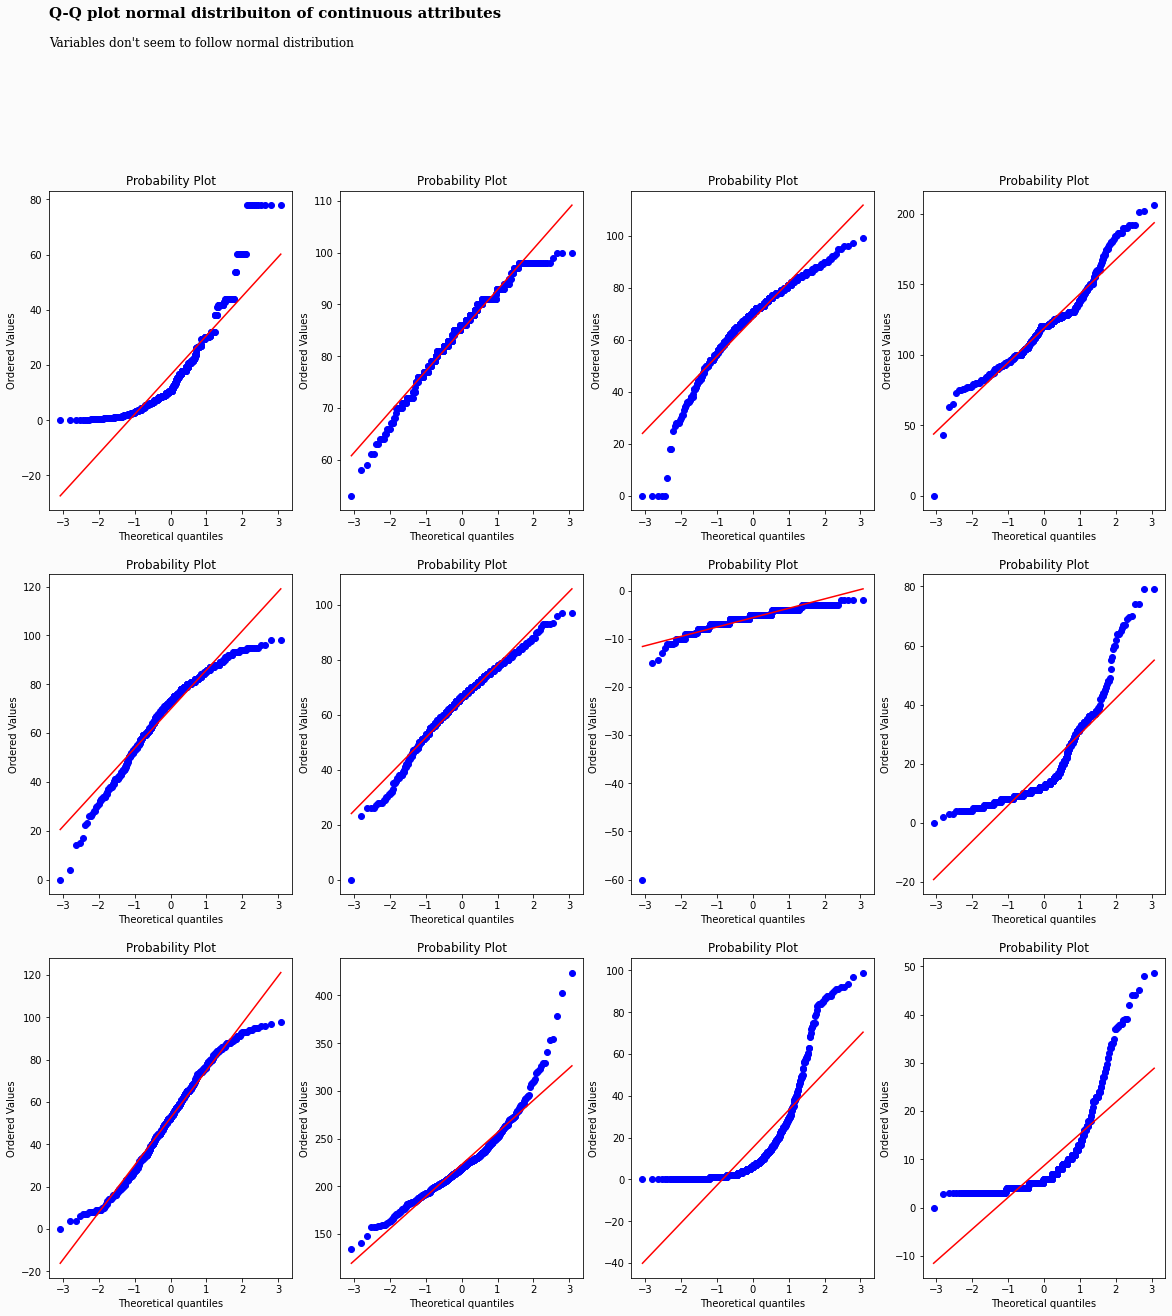

In [ ]:
fig = plt.figure(figsize=(20, 20), facecolor="#fbfbfb")
fig.text(0.125,1.0,'Q-Q plot normal distribuiton of continuous attributes', fontfamily='serif',fontsize=15, fontweight='bold')
fig.text(0.125,0.98,'Variables don\'t seem to follow normal distribution',fontfamily='serif',fontsize=12) 

for i, feature in enumerate(['followers','artist_popularity', 'track_popularity', 'tempo',
                             'energy','danceability','loudness','liveness',	'valence',
                             'duration','acousticness','speechiness']):
  plt.subplot(3, 4, i+1)
  scipy.stats.probplot(data[feature], plot=plt.gca(), dist='norm')

<h3>Scaling the Data and Encoding Labels</h3>

In [ ]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

In [ ]:
scaler = MinMaxScaler()
encoder = LabelEncoder()

In [ ]:
data['artist'] = encoder.fit_transform(data['artist'])
data['title'] = encoder.fit_transform(data['title'])
data['top genre'] = encoder.fit_transform(data['top genre'])

In [ ]:
columns = data.columns

In [ ]:
data[columns.drop(['title', 'artist', 'top genre', 'year'])] = pd.DataFrame(scaler.fit_transform(data[data.columns.drop(['title', 'artist', 'top genre', 'year'])]), columns=columns.drop(['title', 'artist', 'top genre', 'year']))

In [ ]:
data.head()

,title,artist,top genre,followers,artist_popularity,year,tempo,energy,danceability,loudness,liveness,valence,duration,acousticness,speechiness,track_popularity,is_dance_pop
0,214,200,53,0.045911,0.531915,2010,0.470874,0.908163,0.690722,0.965517,0.101010,0.816327,0.286207,0.191919,0.082136,0.838384,0.0
1,313,58,30,0.549176,0.893617,2010,0.422330,0.948980,0.773196,0.948276,0.656566,0.653061,0.444828,0.242424,0.472279,0.828283,0.0
2,536,103,28,0.079526,0.617021,2010,0.582524,0.857143,0.783505,0.982759,0.366162,0.724490,0.227586,0.101010,0.287474,0.808081,1.0
3,41,108,28,0.214164,0.787234,2010,0.577670,0.938776,0.721649,0.965517,0.101010,0.724490,0.555172,0.000000,0.082136,0.797980,1.0
4,266,26,57,0.376852,0.851064,2010,0.529126,0.857143,0.659794,0.948276,0.113636,0.438776,0.300000,0.020202,0.082136,0.787879,0.0


In [ ]:
data.describe()

,title,artist,top genre,followers,artist_popularity,year,tempo,energy,danceability,loudness,liveness,valence,duration,acousticness,speechiness,track_popularity,is_dance_pop
count,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000
mean,313.454824,102.222052,29.911179,0.209438,0.680167,2015.006126,0.575890,0.711950,0.669465,0.937443,0.226243,0.535528,0.306145,0.153449,0.178006,0.685167,0.514548
std,181.618642,60.348589,13.592833,0.199121,0.169535,2.889046,0.120511,0.167680,0.138608,0.047759,0.170433,0.229070,0.119733,0.216660,0.163149,0.149773,0.500171
min,0.000000,0.000000,0.000000,0.000000,0.000000,2010.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,157.000000,49.000000,28.000000,0.068802,0.595745,2013.000000,0.485437,0.612245,0.597938,0.915466,0.113636,0.357143,0.227586,0.020202,0.082136,0.616162,0.000000
50%,314.000000,100.000000,28.000000,0.134512,0.702128,2015.000000,0.582524,0.744898,0.690722,0.948276,0.151515,0.540816,0.293103,0.060606,0.118686,0.707071,1.000000
75%,470.000000,153.000000,28.000000,0.289277,0.808511,2017.000000,0.626214,0.826531,0.762887,0.965517,0.303030,0.708163,0.358621,0.191919,0.205339,0.787879,1.000000
max,628.000000,211.000000,61.000000,1.000000,1.000000,2020.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<p>The features (excluding the categorical ones) were scaled with MinMaxScaler. This scaler was chosen because StandardScaler is sensitive to outliers, and as we saw in the box plots, the features had a lot of outliers.</p>

<h3>Dimensionality reduction and visualization of the whole dataset</h3>

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(2)
decomposed_features = pca.fit_transform(data[data.columns.drop(['is_dance_pop'])])

In [ ]:
decomposed_features

array([[-1.00702336e+02,  9.59745520e+01],
       [ 1.01025200e-01, -4.42183677e+01],
       [ 2.22516509e+02,  3.62266230e+00],
       ...,
       [-6.71440257e+01, -2.24398567e+01],
       [ 8.21515582e+01, -4.71326419e+01],
       [ 1.19267676e+02,  9.96195591e+01]])

In [ ]:
colors = ['#56f58b','#ff4f42']

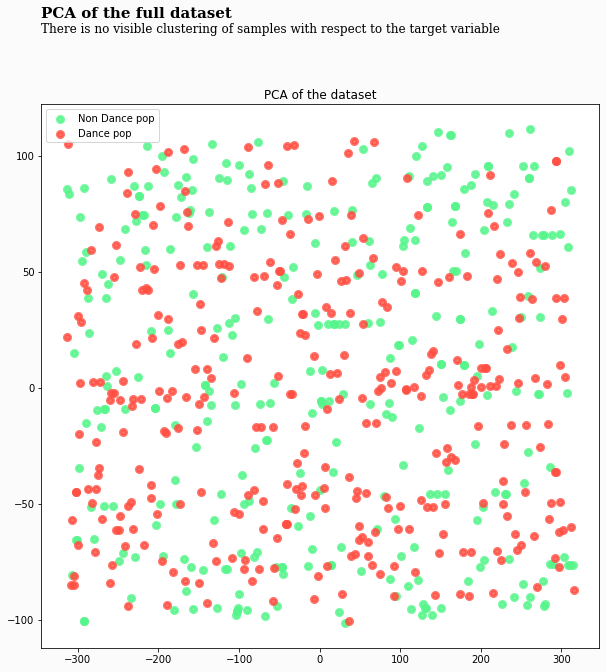

In [ ]:
fig = plt.figure(figsize=(10, 10), facecolor="#fbfbfb")
fig.text(0.125,1.0,'PCA of the full dataset', fontfamily='serif',fontsize=15, fontweight='bold')
fig.text(0.125,0.98,'There is no visible clustering of samples with respect to the target variable',fontfamily='serif',fontsize=12) 

for i, color in enumerate(zip(colors)):
    plt.scatter(decomposed_features[data['is_dance_pop'] == i, 0], decomposed_features[data['is_dance_pop'] == i, 1], color=color, alpha=.8, lw=3,
                label='Dance pop' if i==1 else 'Non Dance pop')
plt.legend(loc='best', shadow=False)
plt.title('PCA of the dataset')
plt.show()

<h3>Outlier detection</h3>

In [ ]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

title                313.000000
artist               104.000000
top genre              0.000000
followers              0.220475
artist_popularity      0.212766
year                   4.000000
tempo                  0.140777
energy                 0.214286
danceability           0.164948
loudness               0.050052
liveness               0.189394
valence                0.351020
duration               0.131034
acousticness           0.171717
speechiness            0.123203
track_popularity       0.171717
is_dance_pop           1.000000
dtype: float64


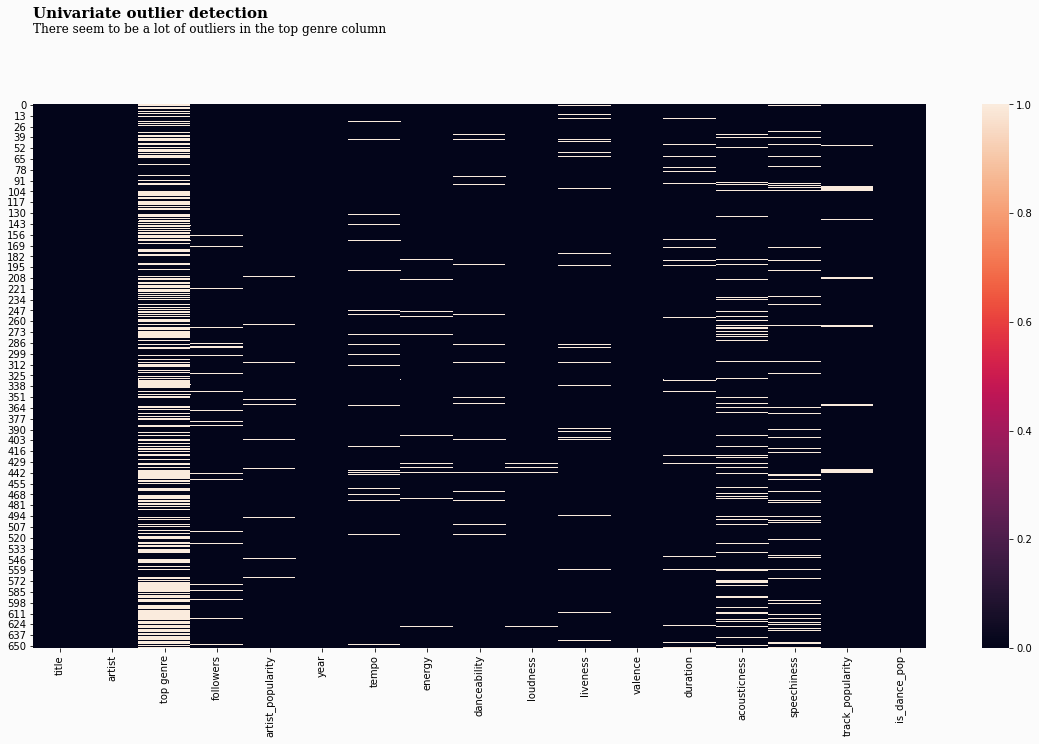

In [ ]:
fig = plt.figure(figsize=(20, 10), facecolor="#fbfbfb")
fig.text(0.125,1.0,'Univariate outlier detection', fontfamily='serif',fontsize=15, fontweight='bold')
fig.text(0.125,0.98,'There seem to be a lot of outliers in the top genre column',fontfamily='serif',fontsize=12) 

sns.heatmap(((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))), ax=plt.gca())
plt.show()

<p>We can see that we have a lot of univariate outliers in the top genre column, as well as in the acousticness and speechiness columns. There are a some outliers in other columns as well. </p>

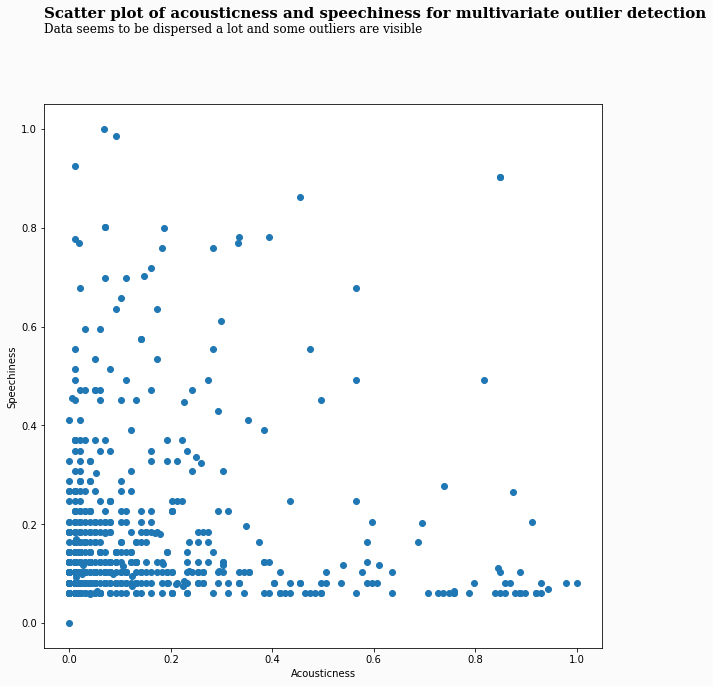

In [ ]:
fig = plt.figure(figsize=(10, 10), facecolor="#fbfbfb")
fig.text(0.125,1.0,'Scatter plot of acousticness and speechiness for multivariate outlier detection', fontfamily='serif',fontsize=15, fontweight='bold')
fig.text(0.125,0.98,'Data seems to be dispersed a lot and some outliers are visible',fontfamily='serif',fontsize=12) 

plt.scatter(data['acousticness'], data['speechiness'])
plt.xlabel('Acousticness')
plt.ylabel('Speechiness')
plt.show()

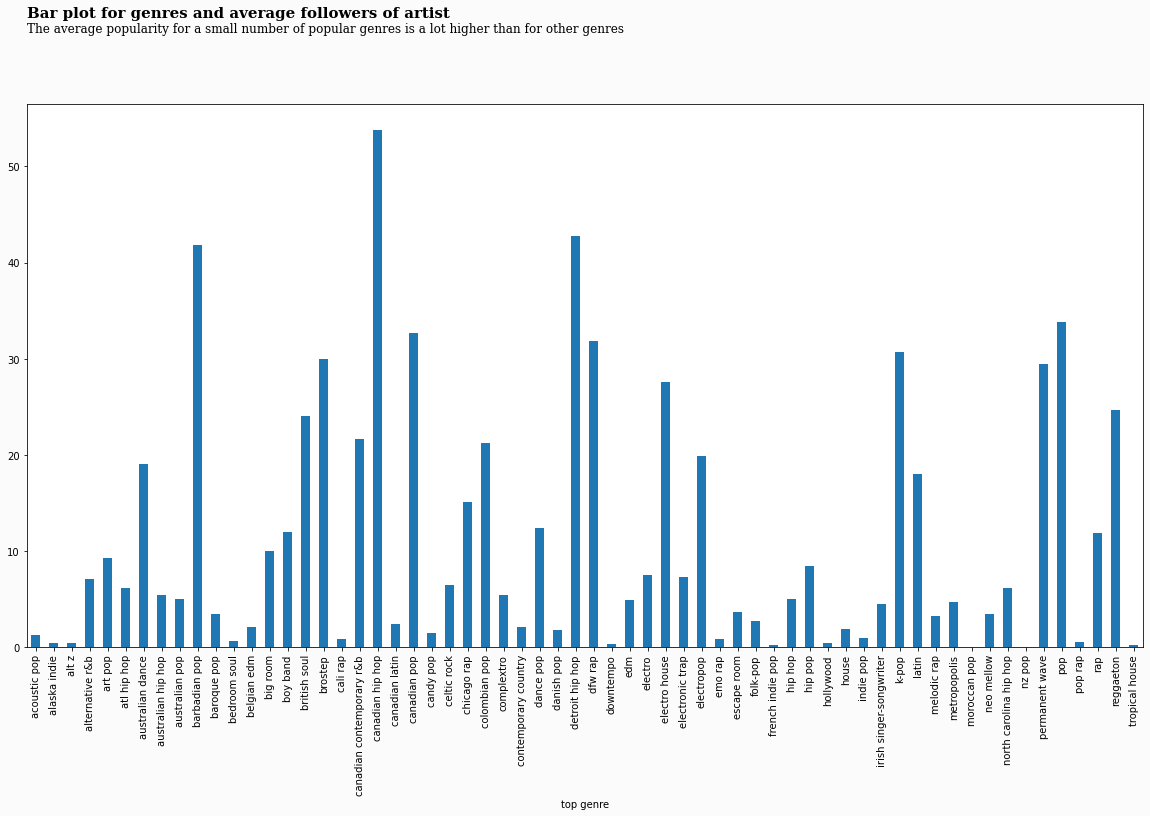

In [ ]:
fig = plt.figure(figsize=(20, 10), facecolor="#fbfbfb")
fig.text(0.125,1.0,'Bar plot for genres and average followers of artist', fontfamily='serif',fontsize=15, fontweight='bold')
fig.text(0.125,0.98,'The average popularity for a small number of popular genres is a lot higher than for other genres',fontfamily='serif',fontsize=12) 

read.groupby('top genre')['followers'].mean().plot.bar(ax=plt.gca())
plt.xticks(rotation=90)
plt.show()

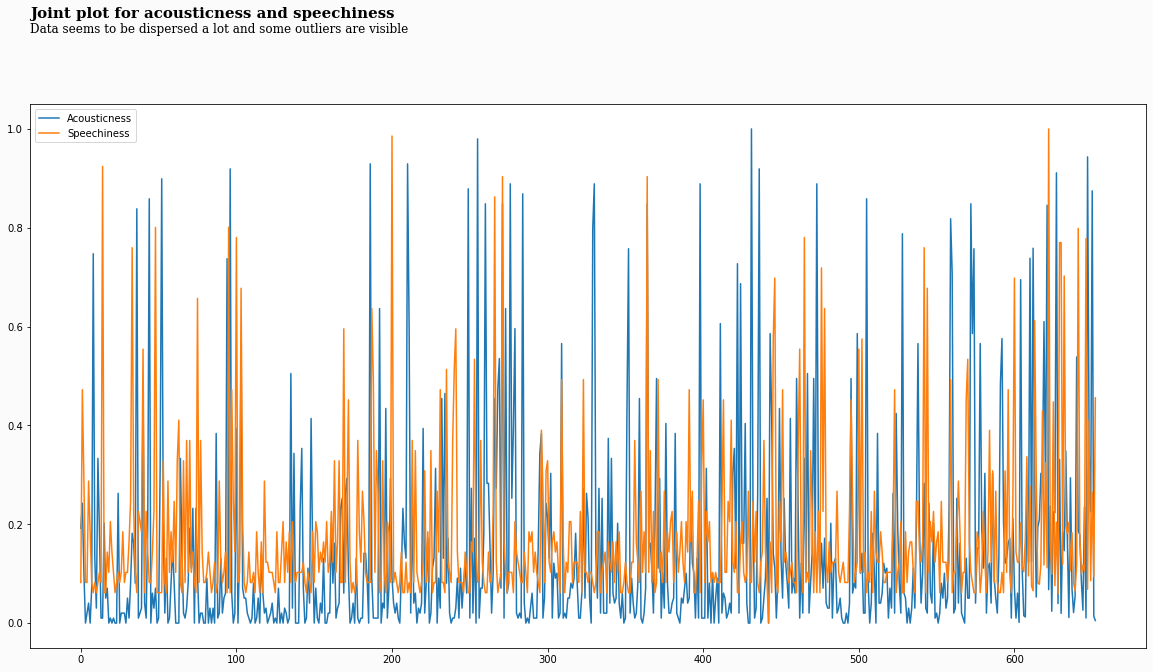

In [ ]:
fig = plt.figure(figsize=(20, 10), facecolor="#fbfbfb")
fig.text(0.125,1.0,'Joint plot for acousticness and speechiness', fontfamily='serif',fontsize=15, fontweight='bold')
fig.text(0.125,0.98,'Data seems to be dispersed a lot and some outliers are visible. ',fontfamily='serif',fontsize=12) 

plt.plot(data['acousticness'], label='Acousticness')
plt.plot(data['speechiness'], label = 'Speechiness')
plt.legend()
plt.show()

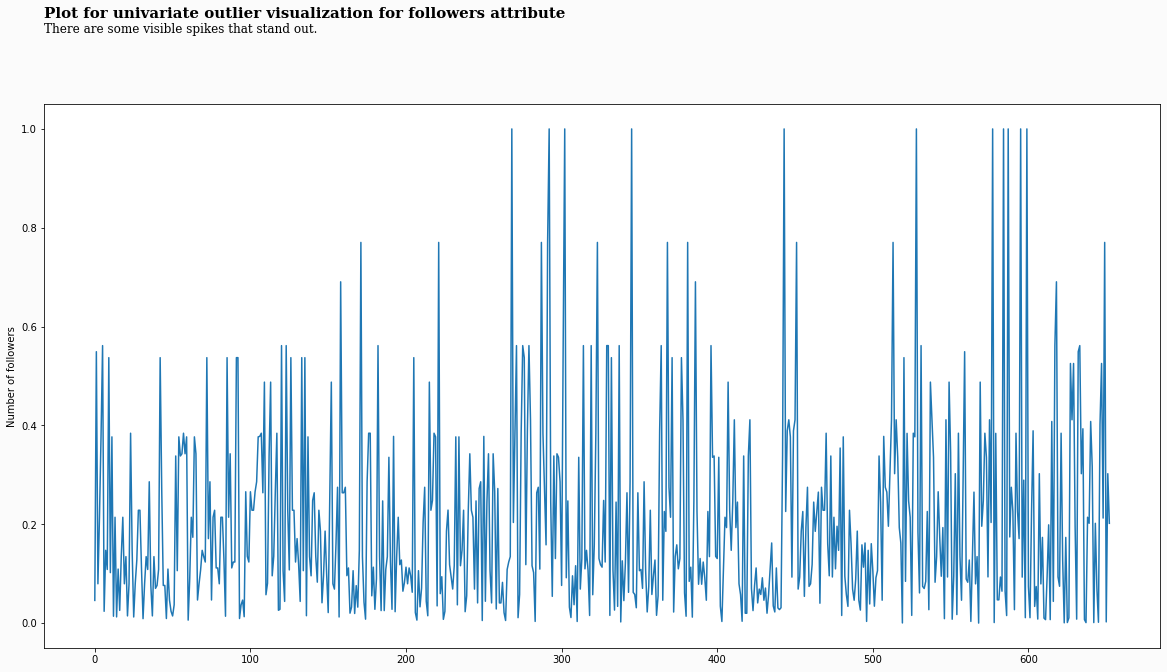

In [ ]:
fig = plt.figure(figsize=(20, 10), facecolor="#fbfbfb")
fig.text(0.125,1.0,'Plot for univariate outlier visualization for followers attribute', fontfamily='serif',fontsize=15, fontweight='bold')
fig.text(0.125,0.98,'There are some visible spikes that stand out. ',fontfamily='serif',fontsize=12) 

plt.plot(data['followers'])
plt.ylabel('Number of followers')
plt.show()

<p>Some of the genres appear extremely rarely, some of them are treated as outliers to the distribution. That is the reason for separating the class variable into 'is_dance_pop' : {true, false} since it accounts for half of the genre variables.</p>

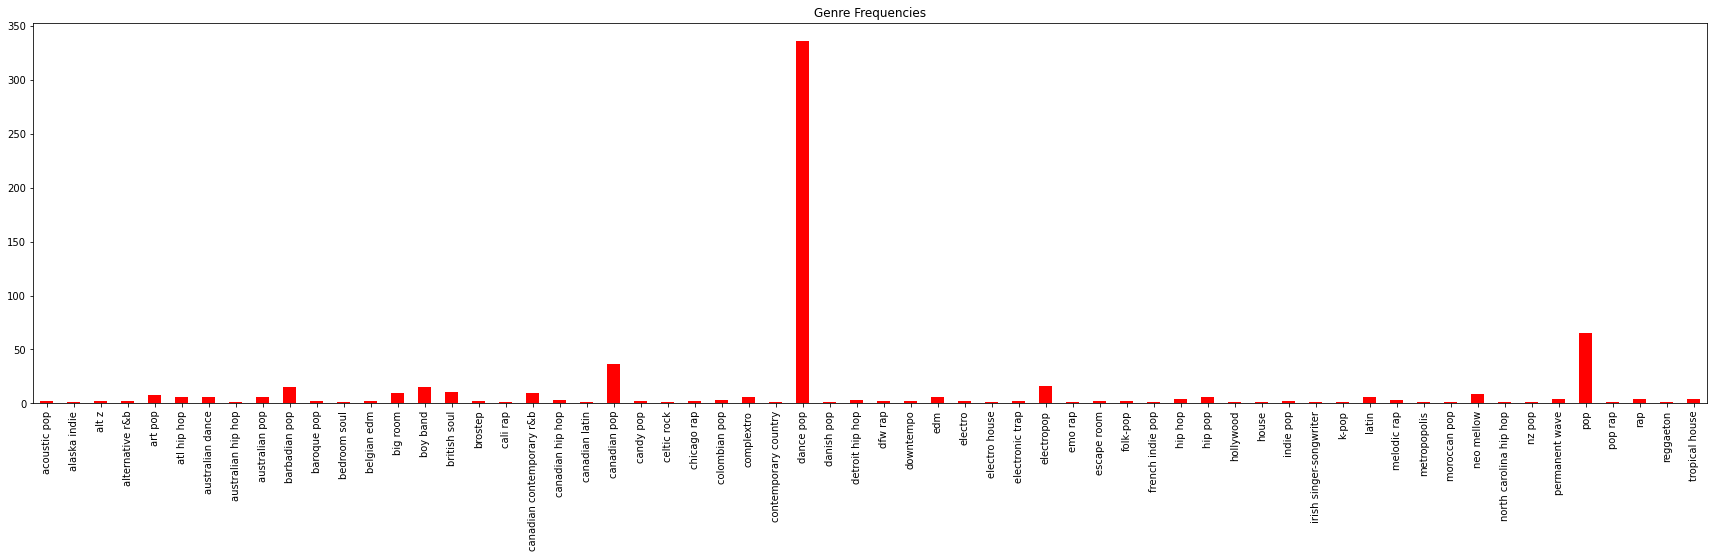

In [ ]:
plt.figure()
data['top genre'].value_counts().sort_index().plot.bar(color='red', figsize=(30, 7), title="Genre Frequencies")
plt.show()